In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3

# Load the model
model = InceptionV3(weights='imagenet', include_top=False)

# Total parameters
model.summary()


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, None,      │        864 │ input_layer_1[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, None,      │      9,216 │ activation_94[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, None,      │     18,432 │ activation_95[0]… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, None,      │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, None,      │      5,120 │ max_pooling2d_4[… │
│                     │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, None,      │    138,240 │ activation_97[0]… │
│                     │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, None,      │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

#----------------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

tujuan = '/content/'
sumber = '/content/drive/My Drive/dataset_citrus.zip'

shutil.copy(sumber, tujuan)

'/content/dataset_citrus.zip'

In [ ]:
import shutil

sumber = '/content/dataset_citrus'
tujuan = '/content/drive/My Drive/dataset_citrus'

shutil.copytree(sumber, tujuan)

In [ ]:
!unzip dataset_citrus.zip

Archive:  dataset_citrus.zip
   creating: dataset_citrus/
  inflating: __MACOSX/._dataset_citrus  
  inflating: dataset_citrus/f (273).png  
  inflating: __MACOSX/dataset_citrus/._f (273).png  
  inflating: dataset_citrus/b (276).jpg  
  inflating: __MACOSX/dataset_citrus/._b (276).jpg  
  inflating: dataset_citrus/c (114).jpg  
  inflating: __MACOSX/dataset_citrus/._c (114).jpg  
  inflating: dataset_citrus/b (53).jpg  
  inflating: __MACOSX/dataset_citrus/._b (53).jpg  
  inflating: dataset_citrus/b (333).jpg  
  inflating: __MACOSX/dataset_citrus/._b (333).jpg  
  inflating: dataset_citrus/b (299).jpg  
  inflating: __MACOSX/dataset_citrus/._b (299).jpg  
  inflating: dataset_citrus/f (26).png  
  inflating: __MACOSX/dataset_citrus/._f (26).png  
  inflating: dataset_citrus/c (53).jpg  
  inflating: __MACOSX/dataset_citrus/._c (53).jpg  
  inflating: dataset_citrus/c (143).jpg  
  inflating: __MACOSX/dataset_citrus/._c (143).jpg  
  inflating: dataset_citrus/b (221).jpg  
  inflatin

In [ ]:
!ls -1 /content/dataset_citrus | wc -l

1001


In [ ]:
!rm -rf /content/__MACOSX

move to best model

#best model

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

# Load dataset
csv_path = "/content/train_citrus_update - Sheet4.csv"
image_folder = "/content/dataset_citrus"
df = pd.read_csv(csv_path)

# Labels
labels = df.iloc[:, 1:].values
label_names = df.columns[1:]

# Train/test split
train_files, val_files, train_labels, val_labels = train_test_split(df['nama'], labels, test_size=0.2, random_state=42)

# Use InceptionV3 input size
img_size = (299, 299)

# Preprocess image function
def preprocess_image(filename):
    path = os.path.join(image_folder, filename)
    img = load_img(path, target_size=img_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    return img_array

# Prepare datasets
X_train = np.array([preprocess_image(f) for f in train_files])
X_val = np.array([preprocess_image(f) for f in val_files])
y_train = np.array(train_labels)
y_val = np.array(val_labels)

# Build InceptionV3 model
base_model = InceptionV3(include_top=False, input_shape=(299, 299, 3), weights='imagenet')
base_model.trainable = False  # Freeze base for now

inputs = Input(shape=(299, 299, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
outputs = Dense(y_train.shape[1], activation='sigmoid')(x)

model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

checkpoint = ModelCheckpoint(
    filepath='inceptionv3_best_val_loss.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[checkpoint])




87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.1801 - loss: 0.6317 - precision: 0.4405 - recall: 0.3546
Epoch 1: val_loss improved from inf to 0.48134, saving model to inceptionv3_best_val_loss.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 43s 795ms/step - accuracy: 0.1832 - loss: 0.6298 - precision: 0.4431 - recall: 0.3512 - val_accuracy: 0.4378 - val_loss: 0.4813 - val_precision: 0.9580 - val_recall: 0.2977
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.4391 - loss: 0.4743 - precision: 0.8102 - recall: 0.4461
Epoch 2: val_loss improved from 0.48134 to 0.39174, saving model to inceptionv3_best_val_loss.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - accuracy: 0.4397 - loss: 0.4734 - precision: 0.8109 - recall: 0.4488 - val_accuracy: 0.5323 - val_loss: 0.3917 - val_precision: 0.9192 - val_recall: 0.7128
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.5521 - loss: 0.3937 - precision: 0.8567 - recall: 0.6509
Epoch 3: val_loss improved from 0.39174 to 0.32922, saving model to inceptionv3_best_val_loss.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - accuracy: 0.5526 - loss: 0.3931 - precision: 0.8570 - recall: 0.6521 - val_accuracy: 0.6070 - val_loss: 0.3292 - val_precision: 0.9172 - val_recall: 0.7807
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.5924 - loss: 0.3309 - precision: 0.8881 - recall: 0.7445
Epoch 4: val_loss improved from 0.32922 to 0.28853, saving model to inceptionv3_best_val_loss.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 189ms/step - accuracy: 0.5916 - loss: 0.3308 - precision: 0.8880 - recall: 0.7446 - val_accuracy: 0.6567 - val_loss: 0.2885 - val_precision: 0.9155 - val_recall: 0.8198
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.6195 - loss: 0.2927 - precision: 0.9085 - recall: 0.7955
Epoch 5: val_loss improved from 0.28853 to 0.25701, saving model to inceptionv3_best_val_loss.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step - accuracy: 0.6183 - loss: 0.2925 - precision: 0.9080 - recall: 0.7963 - val_accuracy: 0.5572 - val_loss: 0.2570 - val_precision: 0.9118 - val_recall: 0.8642
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.6022 - loss: 0.2642 - precision: 0.9087 - recall: 0.8156
Epoch 6: val_loss improved from 0.25701 to 0.23525, saving model to inceptionv3_best_val_loss.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - accuracy: 0.6021 - loss: 0.2641 - precision: 0.9085 - recall: 0.8161 - val_accuracy: 0.5672 - val_loss: 0.2352 - val_precision: 0.9040 - val_recall: 0.8851
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.5750 - loss: 0.2400 - precision: 0.9047 - recall: 0.8473
Epoch 7: val_loss improved from 0.23525 to 0.21685, saving model to inceptionv3_best_val_loss.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - accuracy: 0.5754 - loss: 0.2401 - precision: 0.9050 - recall: 0.8473 - val_accuracy: 0.6816 - val_loss: 0.2168 - val_precision: 0.9200 - val_recall: 0.9008
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.5699 - loss: 0.2383 - precision: 0.9161 - recall: 0.8485
Epoch 8: val_loss improved from 0.21685 to 0.20115, saving model to inceptionv3_best_val_loss.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - accuracy: 0.5702 - loss: 0.2379 - precision: 0.9163 - recall: 0.8489 - val_accuracy: 0.7463 - val_loss: 0.2012 - val_precision: 0.9182 - val_recall: 0.9086
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.6194 - loss: 0.2119 - precision: 0.9137 - recall: 0.8708
Epoch 9: val_loss improved from 0.20115 to 0.18878, saving model to inceptionv3_best_val_loss.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.6184 - loss: 0.2117 - precision: 0.9138 - recall: 0.8709 - val_accuracy: 0.5672 - val_loss: 0.1888 - val_precision: 0.9353 - val_recall: 0.9060
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.5800 - loss: 0.2116 - precision: 0.9160 - recall: 0.8619
Epoch 10: val_loss improved from 0.18878 to 0.17773, saving model to inceptionv3_best_val_loss.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step - accuracy: 0.5797 - loss: 0.2111 - precision: 0.9164 - recall: 0.8627 - val_accuracy: 0.6468 - val_loss: 0.1777 - val_precision: 0.9339 - val_recall: 0.9217
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.6060 - loss: 0.1997 - precision: 0.9217 - recall: 0.8647
Epoch 11: val_loss improved from 0.17773 to 0.17003, saving model to inceptionv3_best_val_loss.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - accuracy: 0.6063 - loss: 0.1992 - precision: 0.9222 - recall: 0.8655 - val_accuracy: 0.6169 - val_loss: 0.1700 - val_precision: 0.9339 - val_recall: 0.9217
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.5998 - loss: 0.1860 - precision: 0.9236 - recall: 0.8826
Epoch 12: val_loss improved from 0.17003 to 0.16096, saving model to inceptionv3_best_val_loss.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.5998 - loss: 0.1856 - precision: 0.9242 - recall: 0.8832 - val_accuracy: 0.6269 - val_loss: 0.1610 - val_precision: 0.9418 - val_recall: 0.9295
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.6064 - loss: 0.1723 - precision: 0.9396 - recall: 0.9029
Epoch 13: val_loss improved from 0.16096 to 0.15323, saving model to inceptionv3_best_val_loss.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.6059 - loss: 0.1723 - precision: 0.9396 - recall: 0.9028 - val_accuracy: 0.6517 - val_loss: 0.1532 - val_precision: 0.9441 - val_recall: 0.9269
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.6466 - loss: 0.1600 - precision: 0.9380 - recall: 0.9113
Epoch 14: val_loss did not improve from 0.15323
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - accuracy: 0.6463 - loss: 0.1600 - precision: 0.9382 - recall: 0.9112 - val_accuracy: 0.6070 - val_loss: 0.1541 - val_precision: 0.9337 - val_recall: 0.9191
Epoch 15/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.6116 - loss: 0.1549 - precision: 0.9447 - recall: 0.9125
Epoch 15: val_loss improved from 0.15323 to 0.14817, saving model to inceptionv3_best_val_loss.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.6112 - loss: 0.1550 - precision: 0.9448 - recall: 0.9122 - val_accuracy: 0.6866 - val_loss: 0.1482 - val_precision: 0.9301 - val_recall: 0.9373
Epoch 16/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.6179 - loss: 0.1492 - precision: 0.9541 - recall: 0.9241
Epoch 16: val_loss improved from 0.14817 to 0.13692, saving model to inceptionv3_best_val_loss.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - accuracy: 0.6176 - loss: 0.1493 - precision: 0.9538 - recall: 0.9238 - val_accuracy: 0.6617 - val_loss: 0.1369 - val_precision: 0.9496 - val_recall: 0.9347
Epoch 17/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.6462 - loss: 0.1458 - precision: 0.9481 - recall: 0.9188
Epoch 17: val_loss improved from 0.13692 to 0.13572, saving model to inceptionv3_best_val_loss.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - accuracy: 0.6460 - loss: 0.1457 - precision: 0.9481 - recall: 0.9188 - val_accuracy: 0.6219 - val_loss: 0.1357 - val_precision: 0.9396 - val_recall: 0.9347
Epoch 18/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.6225 - loss: 0.1396 - precision: 0.9510 - recall: 0.9069
Epoch 18: val_loss improved from 0.13572 to 0.12895, saving model to inceptionv3_best_val_loss.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 194ms/step - accuracy: 0.6220 - loss: 0.1396 - precision: 0.9510 - recall: 0.9073 - val_accuracy: 0.6567 - val_loss: 0.1289 - val_precision: 0.9472 - val_recall: 0.9373
Epoch 19/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.6435 - loss: 0.1379 - precision: 0.9640 - recall: 0.9192
Epoch 19: val_loss did not improve from 0.12895
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.6432 - loss: 0.1377 - precision: 0.9637 - recall: 0.9194 - val_accuracy: 0.6269 - val_loss: 0.1293 - val_precision: 0.9398 - val_recall: 0.9373
Epoch 20/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.6416 - loss: 0.1361 - precision: 0.9526 - recall: 0.9086
Epoch 20: val_loss improved from 0.12895 to 0.12368, saving model to inceptionv3_best_val_loss.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - accuracy: 0.6414 - loss: 0.1359 - precision: 0.9526 - recall: 0.9090 - val_accuracy: 0.6667 - val_loss: 0.1237 - val_precision: 0.9446 - val_recall: 0.9347
Epoch 21/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.6155 - loss: 0.1264 - precision: 0.9563 - recall: 0.9222
Epoch 21: val_loss improved from 0.12368 to 0.11820, saving model to inceptionv3_best_val_loss.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - accuracy: 0.6152 - loss: 0.1264 - precision: 0.9562 - recall: 0.9224 - val_accuracy: 0.6368 - val_loss: 0.1182 - val_precision: 0.9500 - val_recall: 0.9426
Epoch 22/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.6106 - loss: 0.1184 - precision: 0.9632 - recall: 0.9344
Epoch 22: val_loss did not improve from 0.11820
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - accuracy: 0.6113 - loss: 0.1185 - precision: 0.9630 - recall: 0.9342 - val_accuracy: 0.6269 - val_loss: 0.1186 - val_precision: 0.9424 - val_recall: 0.9399
Epoch 23/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.6045 - loss: 0.1121 - precision: 0.9646 - recall: 0.9402
Epoch 23: val_loss improved from 0.11820 to 0.11577, saving model to inceptionv3_best_val_loss.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - accuracy: 0.6049 - loss: 0.1123 - precision: 0.9644 - recall: 0.9398 - val_accuracy: 0.6716 - val_loss: 0.1158 - val_precision: 0.9449 - val_recall: 0.9399
Epoch 24/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.6602 - loss: 0.1143 - precision: 0.9625 - recall: 0.9418
Epoch 24: val_loss improved from 0.11577 to 0.11056, saving model to inceptionv3_best_val_loss.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 208ms/step - accuracy: 0.6599 - loss: 0.1144 - precision: 0.9625 - recall: 0.9415 - val_accuracy: 0.6418 - val_loss: 0.1106 - val_precision: 0.9476 - val_recall: 0.9452
Epoch 25/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.6439 - loss: 0.1111 - precision: 0.9684 - recall: 0.9364
Epoch 25: val_loss did not improve from 0.11056
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - accuracy: 0.6429 - loss: 0.1112 - precision: 0.9684 - recall: 0.9363 - val_accuracy: 0.6318 - val_loss: 0.1122 - val_precision: 0.9393 - val_recall: 0.9295
Epoch 26/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.6400 - loss: 0.1133 - precision: 0.9636 - recall: 0.9349
Epoch 26: val_loss improved from 0.11056 to 0.10630, saving model to inceptionv3_best_val_loss.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 0.6397 - loss: 0.1133 - precision: 0.9636 - recall: 0.9347 - val_accuracy: 0.6418 - val_loss: 0.1063 - val_precision: 0.9501 - val_recall: 0.9452
Epoch 27/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.6833 - loss: 0.1005 - precision: 0.9657 - recall: 0.9501
Epoch 27: val_loss did not improve from 0.10630
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step - accuracy: 0.6817 - loss: 0.1008 - precision: 0.9656 - recall: 0.9496 - val_accuracy: 0.6119 - val_loss: 0.1128 - val_precision: 0.9351 - val_recall: 0.9399
Epoch 28/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.6679 - loss: 0.1109 - precision: 0.9545 - recall: 0.9389
Epoch 28: val_loss did not improve from 0.10630
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - accuracy: 0.6678 - loss: 0.1109 - precision: 0.9547 - recall: 0.9390 - val_accuracy: 0.6219 - val_loss: 0.1093 - val_precision: 0.9440 - val_recall: 0.9243
Epoch 29/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accu

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step - accuracy: 0.6053 - loss: 0.1057 - precision: 0.9687 - recall: 0.9321 - val_accuracy: 0.6816 - val_loss: 0.1021 - val_precision: 0.9476 - val_recall: 0.9452
Epoch 30/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.6704 - loss: 0.1007 - precision: 0.9719 - recall: 0.9428
Epoch 30: val_loss improved from 0.10211 to 0.10014, saving model to inceptionv3_best_val_loss.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - accuracy: 0.6705 - loss: 0.1006 - precision: 0.9718 - recall: 0.9429 - val_accuracy: 0.5871 - val_loss: 0.1001 - val_precision: 0.9427 - val_recall: 0.9452
Epoch 31/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.5747 - loss: 0.1031 - precision: 0.9665 - recall: 0.9403
Epoch 31: val_loss improved from 0.10014 to 0.09678, saving model to inceptionv3_best_val_loss.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - accuracy: 0.5759 - loss: 0.1029 - precision: 0.9665 - recall: 0.9404 - val_accuracy: 0.6567 - val_loss: 0.0968 - val_precision: 0.9551 - val_recall: 0.9452
Epoch 32/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.6574 - loss: 0.0963 - precision: 0.9712 - recall: 0.9425
Epoch 32: val_loss did not improve from 0.09678
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - accuracy: 0.6577 - loss: 0.0963 - precision: 0.9711 - recall: 0.9426 - val_accuracy: 0.6567 - val_loss: 0.0984 - val_precision: 0.9474 - val_recall: 0.9399
Epoch 33/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.6232 - loss: 0.0935 - precision: 0.9764 - recall: 0.9449
Epoch 33: val_loss improved from 0.09678 to 0.09275, saving model to inceptionv3_best_val_loss.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 206ms/step - accuracy: 0.6228 - loss: 0.0934 - precision: 0.9763 - recall: 0.9448 - val_accuracy: 0.6269 - val_loss: 0.0927 - val_precision: 0.9481 - val_recall: 0.9530
Epoch 34/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.6275 - loss: 0.0977 - precision: 0.9609 - recall: 0.9493
Epoch 34: val_loss did not improve from 0.09275
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - accuracy: 0.6276 - loss: 0.0976 - precision: 0.9612 - recall: 0.9495 - val_accuracy: 0.6418 - val_loss: 0.0941 - val_precision: 0.9432 - val_recall: 0.9530
Epoch 35/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.6293 - loss: 0.0806 - precision: 0.9781 - recall: 0.9550
Epoch 35: val_loss did not improve from 0.09275
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - accuracy: 0.6288 - loss: 0.0810 - precision: 0.9778 - recall: 0.9547 - val_accuracy: 0.6418 - val_loss: 0.0939 - val_precision: 0.9478 - val_recall: 0.9478
Epoch 36/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accu

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - accuracy: 0.6461 - loss: 0.0895 - precision: 0.9701 - recall: 0.9458 - val_accuracy: 0.6866 - val_loss: 0.0912 - val_precision: 0.9529 - val_recall: 0.9504
Epoch 37/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.6687 - loss: 0.0757 - precision: 0.9753 - recall: 0.9550
Epoch 37: val_loss did not improve from 0.09119
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - accuracy: 0.6675 - loss: 0.0761 - precision: 0.9751 - recall: 0.9547 - val_accuracy: 0.6318 - val_loss: 0.0928 - val_precision: 0.9499 - val_recall: 0.9399
Epoch 38/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.6097 - loss: 0.0845 - precision: 0.9814 - recall: 0.9564
Epoch 38: val_loss improved from 0.09119 to 0.08682, saving model to inceptionv3_best_val_loss.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 186ms/step - accuracy: 0.6107 - loss: 0.0846 - precision: 0.9811 - recall: 0.9563 - val_accuracy: 0.6468 - val_loss: 0.0868 - val_precision: 0.9531 - val_recall: 0.9556
Epoch 39/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.6201 - loss: 0.0891 - precision: 0.9697 - recall: 0.9488
Epoch 39: val_loss did not improve from 0.08682
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - accuracy: 0.6203 - loss: 0.0888 - precision: 0.9699 - recall: 0.9490 - val_accuracy: 0.6269 - val_loss: 0.0902 - val_precision: 0.9478 - val_recall: 0.9478
Epoch 40/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.6331 - loss: 0.0692 - precision: 0.9881 - recall: 0.9599
Epoch 40: val_loss improved from 0.08682 to 0.08451, saving model to inceptionv3_best_val_loss.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 203ms/step - accuracy: 0.6340 - loss: 0.0697 - precision: 0.9878 - recall: 0.9597 - val_accuracy: 0.6617 - val_loss: 0.0845 - val_precision: 0.9556 - val_recall: 0.9556
Epoch 41/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.6569 - loss: 0.0789 - precision: 0.9778 - recall: 0.9501
Epoch 41: val_loss did not improve from 0.08451
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - accuracy: 0.6565 - loss: 0.0788 - precision: 0.9779 - recall: 0.9502 - val_accuracy: 0.6269 - val_loss: 0.0849 - val_precision: 0.9531 - val_recall: 0.9556
Epoch 42/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.6290 - loss: 0.0765 - precision: 0.9780 - recall: 0.9599
Epoch 42: val_loss did not improve from 0.08451
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - accuracy: 0.6298 - loss: 0.0766 - precision: 0.9780 - recall: 0.9598 - val_accuracy: 0.6517 - val_loss: 0.0888 - val_precision: 0.9430 - val_recall: 0.9504
Epoch 43/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accu

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - accuracy: 0.6766 - loss: 0.0822 - precision: 0.9779 - recall: 0.9493 - val_accuracy: 0.6418 - val_loss: 0.0804 - val_precision: 0.9555 - val_recall: 0.9530
Epoch 44/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.6422 - loss: 0.0784 - precision: 0.9833 - recall: 0.9546
Epoch 44: val_loss did not improve from 0.08037
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step - accuracy: 0.6417 - loss: 0.0783 - precision: 0.9832 - recall: 0.9546 - val_accuracy: 0.6368 - val_loss: 0.0842 - val_precision: 0.9459 - val_recall: 0.9582
Epoch 45/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.6120 - loss: 0.0735 - precision: 0.9815 - recall: 0.9551
Epoch 45: val_loss did not improve from 0.08037
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 0.6124 - loss: 0.0735 - precision: 0.9814 - recall: 0.9551 - val_accuracy: 0.6716 - val_loss: 0.0804 - val_precision: 0.9530 - val_recall: 0.9530
Epoch 46/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accu

25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - accuracy: 0.6340 - loss: 0.0795 - precision: 0.9806 - recall: 0.9496 - val_accuracy: 0.6667 - val_loss: 0.0797 - val_precision: 0.9556 - val_recall: 0.9556
Epoch 47/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.6331 - loss: 0.0794 - precision: 0.9786 - recall: 0.9519
Epoch 47: val_loss improved from 0.07965 to 0.07718, saving model to inceptionv3_best_val_loss.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - accuracy: 0.6331 - loss: 0.0791 - precision: 0.9787 - recall: 0.9522 - val_accuracy: 0.6667 - val_loss: 0.0772 - val_precision: 0.9509 - val_recall: 0.9608
Epoch 48/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.6105 - loss: 0.0716 - precision: 0.9800 - recall: 0.9612
Epoch 48: val_loss improved from 0.07718 to 0.07701, saving model to inceptionv3_best_val_loss.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - accuracy: 0.6114 - loss: 0.0716 - precision: 0.9800 - recall: 0.9612 - val_accuracy: 0.6567 - val_loss: 0.0770 - val_precision: 0.9557 - val_recall: 0.9582
Epoch 49/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.6348 - loss: 0.0688 - precision: 0.9802 - recall: 0.9613
Epoch 49: val_loss did not improve from 0.07701
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.6356 - loss: 0.0688 - precision: 0.9802 - recall: 0.9613 - val_accuracy: 0.6766 - val_loss: 0.0809 - val_precision: 0.9483 - val_recall: 0.9582
Epoch 50/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.6600 - loss: 0.0595 - precision: 0.9856 - recall: 0.9701
Epoch 50: val_loss did not improve from 0.07701
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - accuracy: 0.6599 - loss: 0.0599 - precision: 0.9854 - recall: 0.9699 - val_accuracy: 0.6567 - val_loss: 0.0806 - val_precision: 0.9506 - val_recall: 0.9556


In [ ]:
from sklearn.metrics import accuracy_score

# Predict probabilities
y_pred_probs = model.predict(X_val)

# Convert probabilities to binary predictions
y_pred = (y_pred_probs > 0.5).astype(int)

# Exact match accuracy
subset_acc = accuracy_score(y_val, y_pred)
print(f"Subset accuracy (exact match ratio): {subset_acc:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step
Subset accuracy (exact match ratio): 0.8657


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred, target_names=label_names))


              precision    recall  f1-score   support

       sehat       1.00      0.98      0.99        56
    berkerak       0.88      1.00      0.94        67
      cekung       0.88      0.77      0.82        39
      bintik       1.00      0.97      0.99        71
       hitam       1.00      0.95      0.97        78
     cokelat       0.92      0.99      0.95        72

   micro avg       0.95      0.96      0.95       383
   macro avg       0.95      0.94      0.94       383
weighted avg       0.95      0.96      0.95       383
 samples avg       0.95      0.96      0.95       383



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


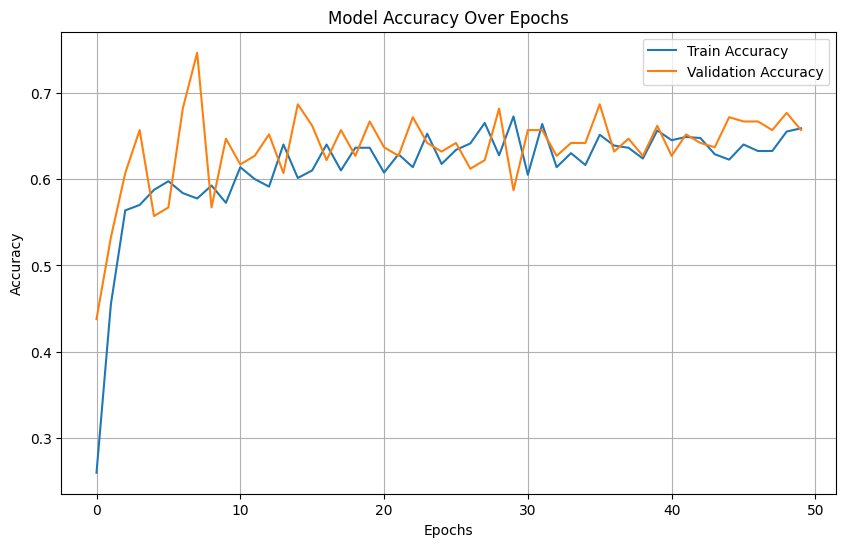

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import shutil

sumber = '/content/inceptionv3_best_val_loss.h5'
tujuan = '/content/drive/My Drive/inceptionv3_best_val_loss.h5'

shutil.copy(sumber, tujuan)

'/content/drive/My Drive/inceptionv3_best_val_loss.h5'